# Central Limit Theorem - Visualizations

In this Notebook, I will showcase many different visualization possibilities when it comes to demonstrating the CLT. It seems like analyzing the shapes of histograms is the most common approach, even if I think that's not the best course of action. 
<br>



CLT says that sample mean S(n) of a distribution will converge to N(mu, sigma^2 / n) as n increases, where mu and sigma are the expected value and standard deviation of the underlying distribution. For detailed math background, see Wikipedia page on [Central Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem). We are not really concerned with the theoretical / math background, we simply want to build nice visualizations. 



In [33]:
# importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from scipy import stats
plt.style.use('seaborn-muted')
%matplotlib inline
import math

The underlying distribution we are going to use to demonstrate is a Bernoulli distribution, will be constant throughout the project, with the following parameters.

In [2]:
p = 0.3
mu = p * 1
sigma_2 = 0.3 * 0.7
sigma = np.sqrt(sigma_2)
list_of_ns = [1, 5, 10, 20, 30, 50, 100, 250, 500]

## Histograms from Random Samples

First, we are going to generate distributions for different n's from the `list_of_ns` list above. 

In [3]:
random_samples = {}

for n in list_of_ns:
    random_samples[n] = []

for i in range(0, 1000 + 1):
    for n in list_of_ns:
        bernoulli_distribution_sample = np.random.binomial(1,p,size = list_of_ns[-1])
        random_samples[n].append(bernoulli_distribution_sample[:n].mean())

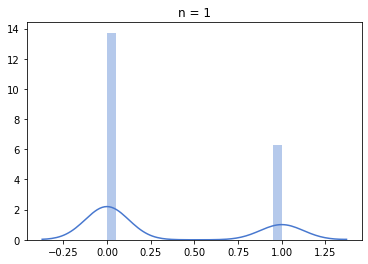

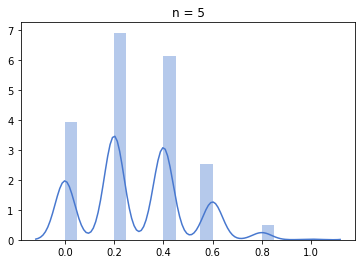

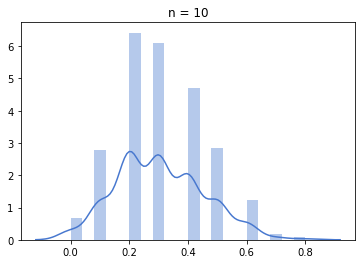

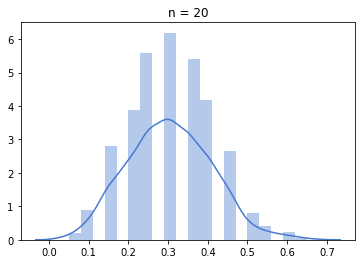

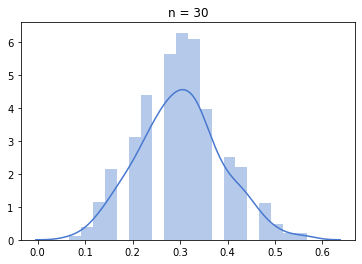

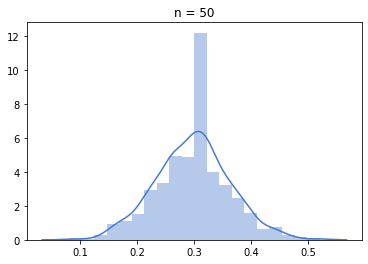

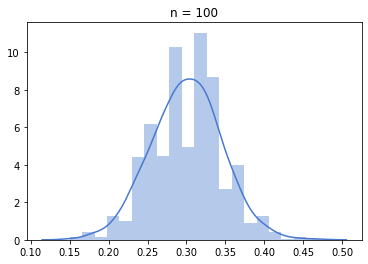

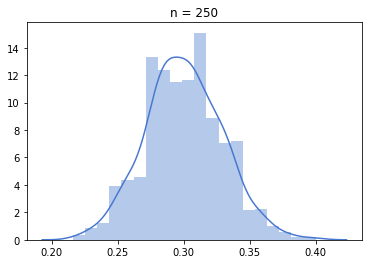

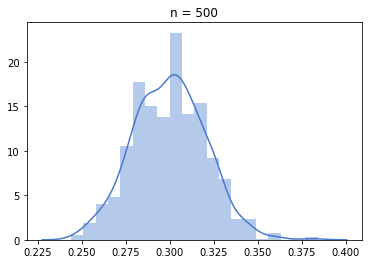

In [4]:
for n in list_of_ns:
    sns.distplot(random_samples[n], bins = 20, kde = True, norm_hist = True)
    plt.title('n = ' + str(n))
#     plt.savefig('./charts/bin_20/bernoulli_sample_ ' + str(n) + '.png')
    plt.show()

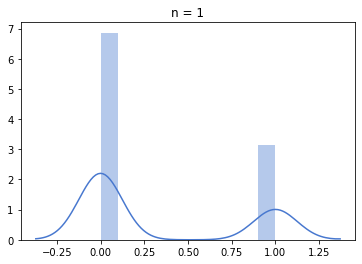

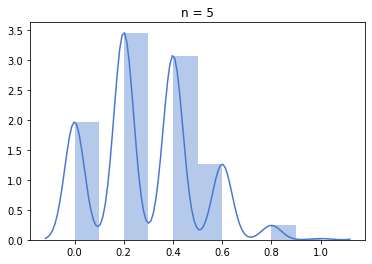

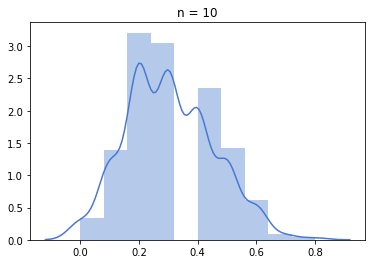

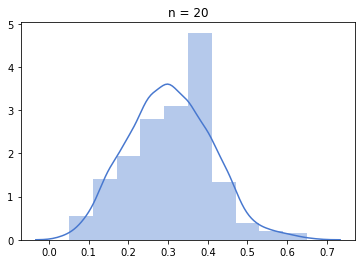

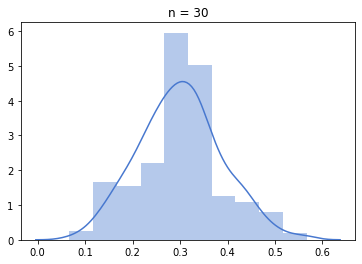

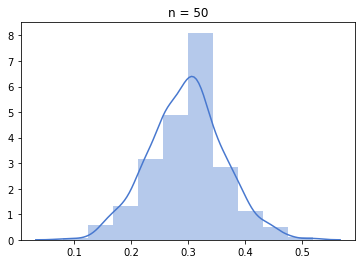

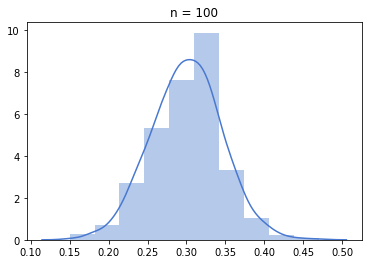

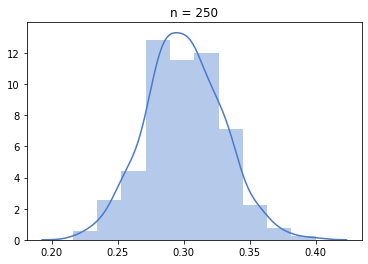

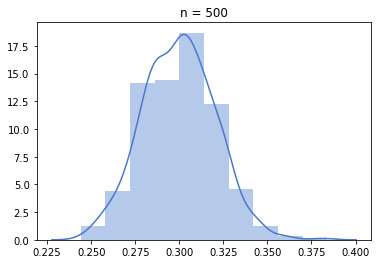

In [5]:
# repeating for bins = 10
for n in list_of_ns:
    sns.distplot(random_samples[n], bins = 10, kde = True, norm_hist = True)
    plt.title('n = ' + str(n))
#     plt.savefig('./charts/bin_10/bernoulli_sample_ ' + str(n) + '.png')
    plt.show()

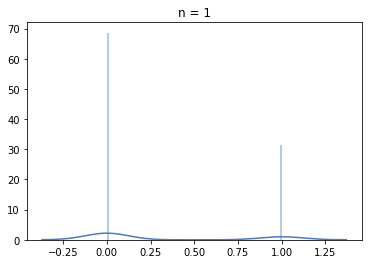

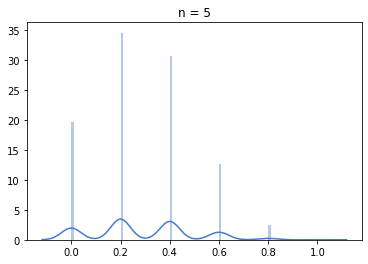

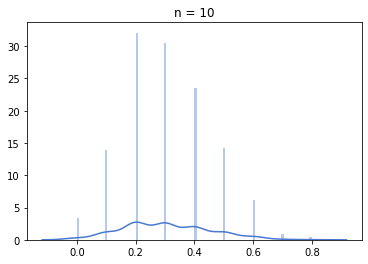

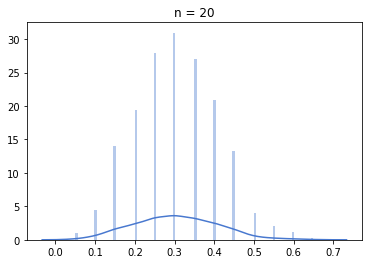

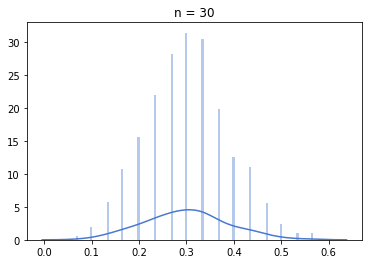

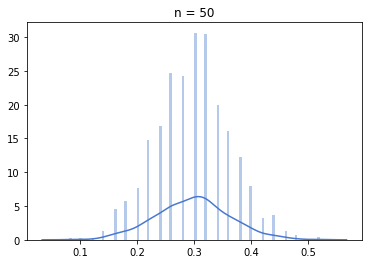

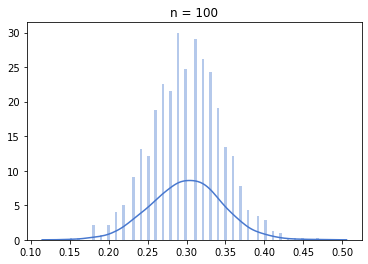

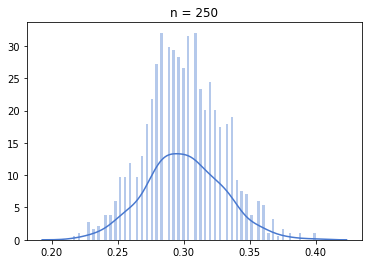

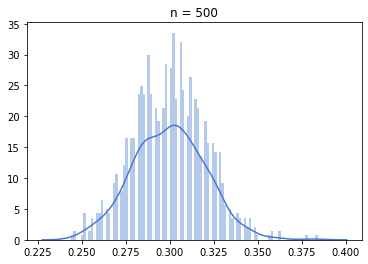

In [6]:
# repeating for bins = 100
for n in list_of_ns:
    sns.distplot(random_samples[n], bins = 100, kde = True, norm_hist = True)
    plt.title('n = ' + str(n))
#     plt.savefig('./charts/bin_100/bernoulli_sample_ ' + str(n) + '.png')
    plt.show()

## Accurate Sample Calculation

In this section, rather than relying on random sampling, we calculate an evenly distributed artificial sample of size 1,000 for different n's. 

### PDF

In [7]:
def distribution_values_range(n):
    "Returns a list of values the mean of n Bernoulli distributions can take."
    values = np.array(range(0, n+1)) / n
    return values

In [8]:
def distribution_values_probability(n):
    """
    Returns the probabilities of the mean of n Bernoulli distributions 
    taking a certain value, in the order of the values.
    """
    probabilities = []
    for i in range(0, n +1):
        probability = combination(n, i) * (1-p) ** (n-i) * p ** i
        probabilities.append(probability)

    return probabilities
    

In [9]:
# https://en.wikipedia.org/wiki/Combination
def combination(n, k):
    "Returns number of k combinations from n"
    return math.factorial(n) / (math.factorial(k) * math.factorial(n-k))

In [10]:
# running it for all different n's now - we will need these dictionaries later on
distribution_values_range_dict = {}
distribution_values_probability_dict = {}

for n in range(1,501):
# for larger n's, we get integer division result too large for a float
    distribution_values_range_dict[n] = distribution_values_range(n)
    distribution_values_probability_dict[n] = distribution_values_probability(n)

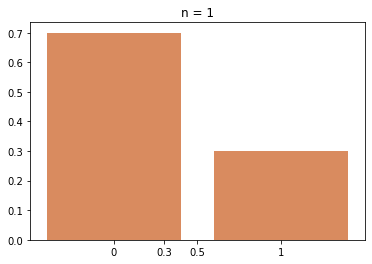

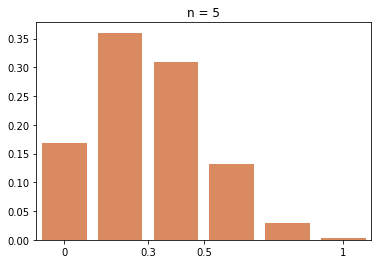

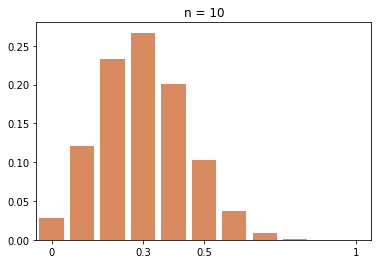

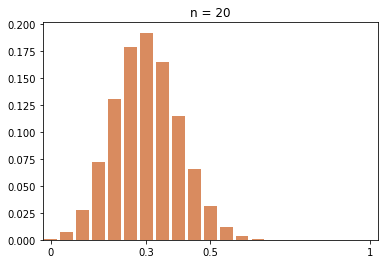

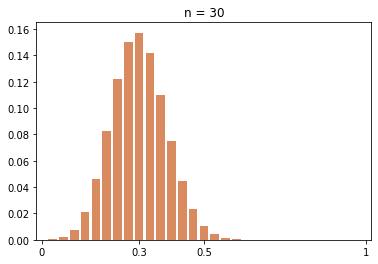

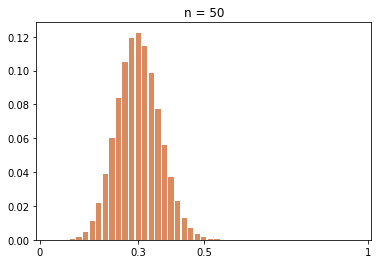

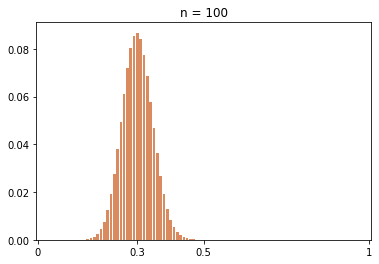

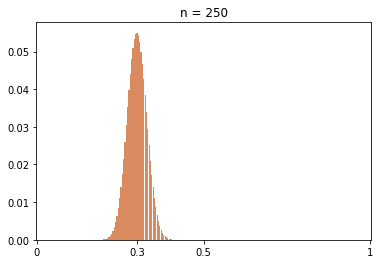

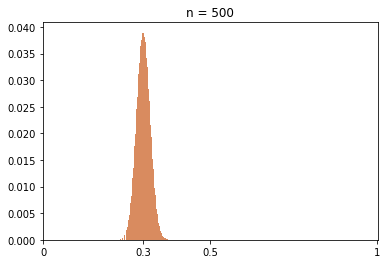

In [11]:
for n in list_of_ns:

    values = distribution_values_range_dict[n]
    probabilities = distribution_values_probability_dict[n]
    sns.barplot(x = values, y = probabilities, color = sns.color_palette("muted")[1])
    plt.xticks([0, n * 3 / 10, n/2, n], [0,0.3, 0.5, 1])
    plt.title('n = ' + str(n))
    plt.savefig('./charts/pmf/bernoulli_sample_' + str(i) + '.png')
    plt.show()

### Simulating Perfect Sample

Next, we are calculating the "perfect" samples, and plot them on histograms. 

In [12]:
accurate_samples_dict = {}
sample_size = 1000

for n in range(1,501):
    
    accurate_samples_dict[n] = []
    values = np.array(distribution_values_range_dict[n])
    probabilities = np.array(distribution_values_probability_dict[n])
    
    cum_probabilities = np.zeros(len(probabilities))
    cum_probabilities[0] = probabilities[0]
    for i in range(1, len(probabilities)):
        cum_probabilities[i] = cum_probabilities[i-1] + probabilities[i]
    
    cum_frequencies =  cum_probabilities * sample_size
    cum_frequencies = np.floor(cum_frequencies)
    
    frequencies = np.zeros(len(cum_frequencies))
    frequencies[0] = cum_frequencies[0]
    
    for i in range(1, len(frequencies)):
        frequencies[i] = cum_frequencies[i] - cum_frequencies[i-1]
        
    for i in range(0, len(frequencies)):
        accurate_samples_dict[n].extend([values[i]] * int(frequencies[i]))

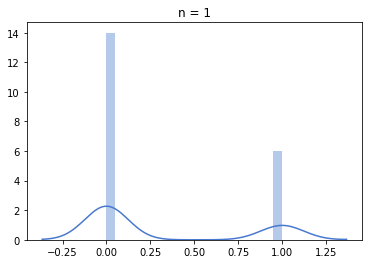

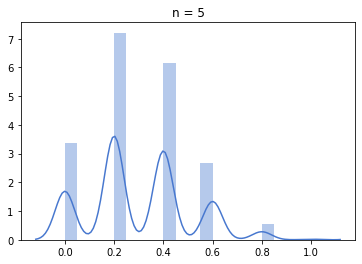

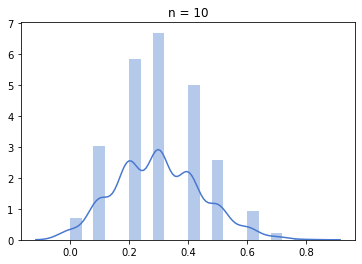

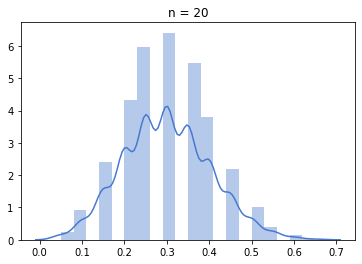

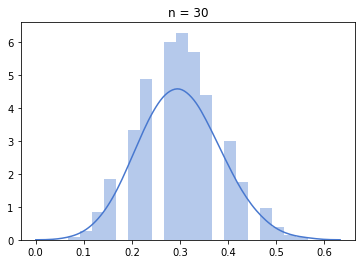

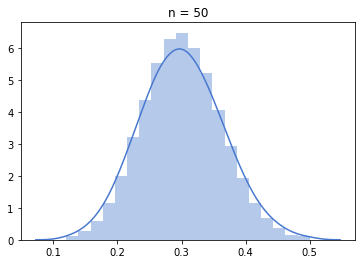

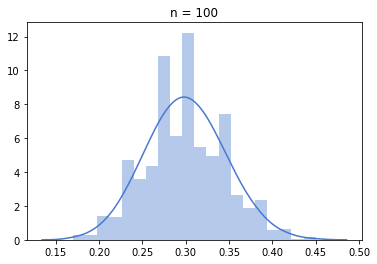

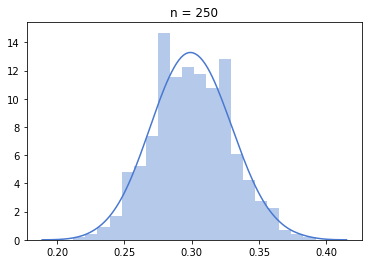

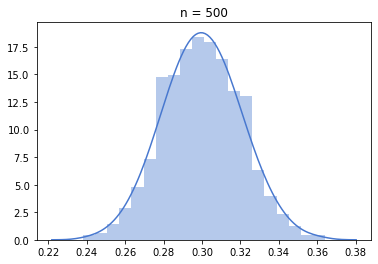

In [13]:
for n in list_of_ns:
    sns.distplot(accurate_samples_dict[n], bins = 20, kde = True, norm_hist = True)
    plt.title('n = ' + str(n))
#     plt.savefig('./charts/accurate_sample_bin_20/accurate_sample_ ' + str(i) + '.png')
    plt.show()

## Cumulative Distribution Functions

In this section, we are plotting a normal cumulative distribution function with S(n). We use the calculated samples from the previous section. 

In [14]:
def cdfs_plot(data, n, show_title = True):

#     plt.figure(figsize=(4,4))

    plt.plot(
        np.sort(np.array(data)), 
        np.linspace(0, 1, len(data), endpoint=False)
    )

    plt.plot(
        np.sort(stats.norm.rvs(loc=mu, scale=np.sqrt(sigma_2 /  n), size=10000)), 
        np.linspace(0, 1, 10000, endpoint=False)
    )
    
    plt.xlim(0, 1)
    plt.legend(['Sample Mean Distribution', 'Normal Distribution'], loc = 'lower right')

    if show_title: plt.title('n = ' + str(n))

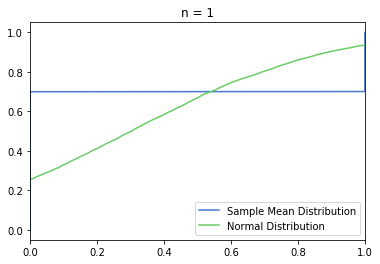

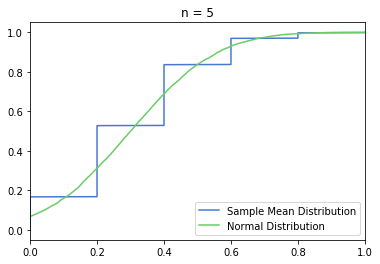

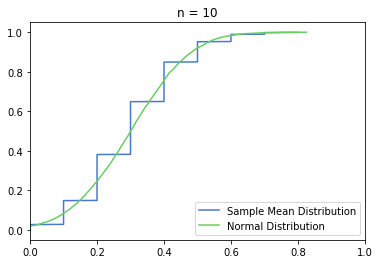

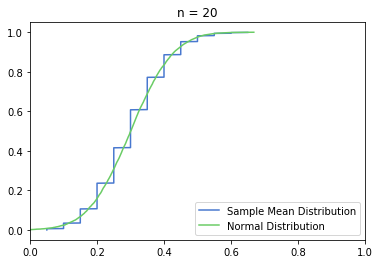

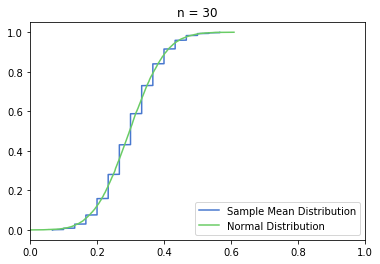

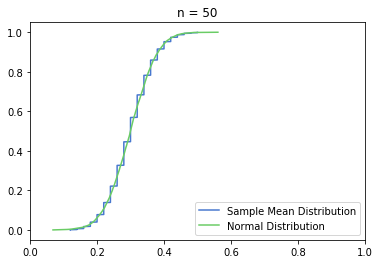

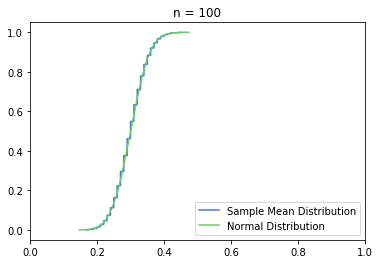

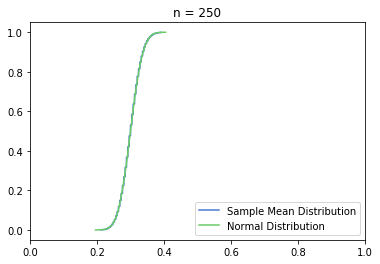

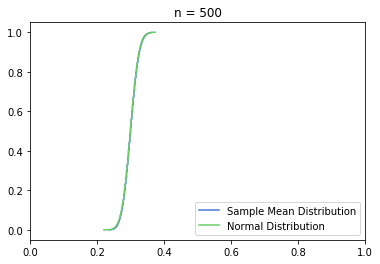

In [15]:
for n in list_of_ns:
    cdfs_plot(accurate_samples_dict[n],n)
#     plt.savefig('./charts/cdfs_nonstandardized/cdf_nonstand_ ' + str(n) + '.png')
    plt.show()

We can do the same with standardized S(n)'s against a standard normal distribution.

In [16]:
def cdfs_plot_standardized(data, n, show_title = False):

    plt.plot(
        np.sort((np.array(data) - mu) / ((sigma /  np.sqrt(n)))), 
        np.linspace(0, 1, len(data), endpoint=False)
    )

    plt.plot(
        np.sort(stats.norm.rvs(loc=0, scale=1, size=10000)), 
        np.linspace(0, 1, 10000, endpoint=False)
    )
    
    plt.xlim(-3, 3)

    plt.legend(['Sample Mean Distribution', 'Normal Distribution'], loc = 'lower right')
    if show_title: plt.title('n = ' + str(n))

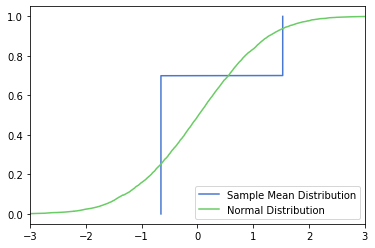

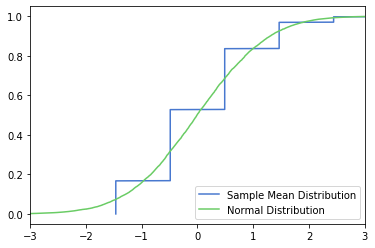

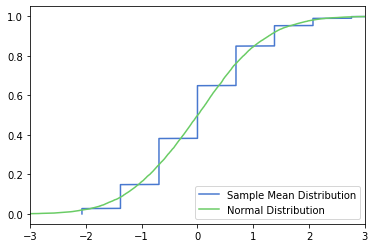

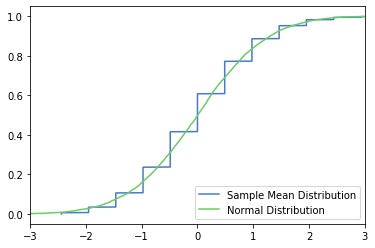

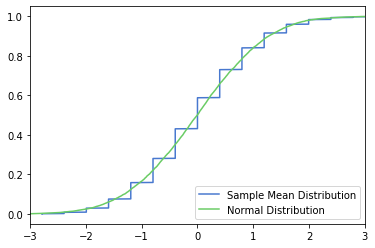

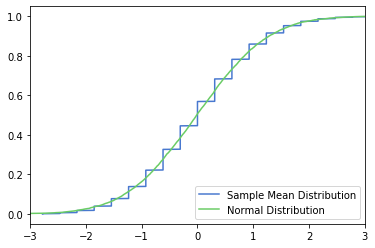

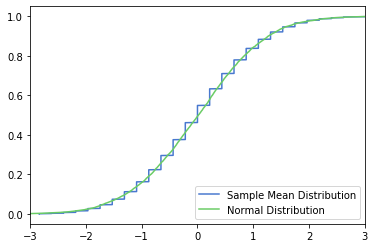

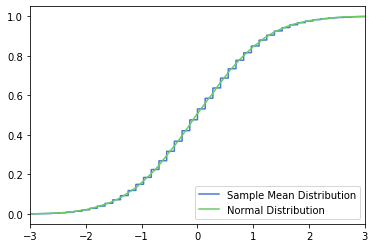

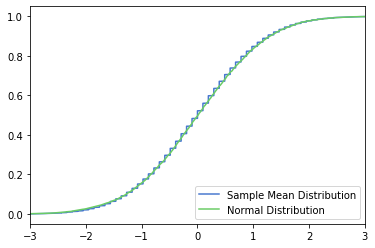

In [17]:
for n in list_of_ns:
    cdfs_plot_standardized(accurate_samples_dict[n],n)
#     plt.savefig('./charts/cdfs_standardized/cdf_stand_ ' + str(n) + '.png')
    plt.show()

## Animated CDFs

In this section, we are animating the CDF functions. In order to show progression of n, we need some adjustments to the plotting functions. Rather than writing n on top of the chart, we are adding a secondary bar chart. 

In [67]:
def cdfs_plot_with_n(data, n, n_max = 10):

    fig = plt.figure(figsize=(7,4)) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[6, 0.5, 0.5]) 
    ax0 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[2])

    ax0.plot(
        np.sort(np.array(data)), 
        np.linspace(0, 1, len(data), endpoint=False)
    )

    ax0.plot(
        np.sort(stats.norm.rvs(loc=mu, scale=np.sqrt(sigma_2 /  n), size=10000)), 
        np.linspace(0, 1, 10000, endpoint=False)
    )
    
    ax0.set_xlim(0,1)
    # we want to show how the distributions are more and more concentrated around mu
    
    ax0.legend(['Sample Mean Distribution', 'Normal Distribution'], loc = 'lower right')
    
    ax2.bar(height = n, x = 'n', width = 0.01, color = sns.color_palette("muted")[3]
    )
    
    ax2.set_ylim(0, n_max)

In [68]:
# runs for couple of seconds
for n in range(1,101):
    cdfs_plot_with_n(accurate_samples_dict[n],n, n_max = 100)
    if n < 10: 
        extra_zeros = '00'
    elif n < 100:
        extra_zeros = '0'
    else:
        extra_zeros = ''
    plt.savefig('./charts/cdfs_nonstand_animation/cdf_nonstand_animation_ ' + extra_zeros + str(n) + '.png')
    plt.close()

In [109]:
# after this, navigate to folder, type in terminal: 
# convert -delay 10 cdf_nonstand_animation_*.png animated_cdfs_nonstand.gif

In [82]:
def cdfs_plot_standardized_with_n(data, n, n_max = 10):

    fig = plt.figure(figsize=(7,4)) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[6, 0.5, 0.5]) 
    ax0 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[2])

    ax0.plot(
        np.sort((np.array(data) - mu) / ((sigma /  np.sqrt(n)))), 
        np.linspace(0, 1, len(data), endpoint=False)
    )

    ax0.plot(
        np.sort(stats.norm.rvs(loc=0, scale=1, size=10000)), 
        np.linspace(0, 1, 10000, endpoint=False)
    )
    
    ax0.set_xlim(-3, 3)

    ax0.legend(['Sample Mean Distribution', 'Normal Distribution'], loc = 'lower right')
    
    ax2.bar(height = n, x = 'n', width = 0.01, color = sns.color_palette("muted")[3]
    )
    
    ax2.set_ylim(0, n_max)

In [85]:
for n in range(1,501):
    cdfs_plot_standardized_with_n(accurate_samples_dict[n],n, n_max = 500)
    if n < 10: 
        extra_zeros = '00'
    elif n < 100:
        extra_zeros = '0'
    else:
        extra_zeros = ''
    plt.savefig('./charts/cdf_stand_animation/cdf_stand_animation_ ' + extra_zeros + str(n) + '.png')
    plt.close()

In [114]:
# after this, navigate to folder, type in terminal: 
# convert -delay 10 cdf_stand_animation_*.png animated_cdfs_stand.gif

## Differences between CDFs

In this section, we calculate the difference between the normal and sample mean distributions. We take a simulated sample of both distributions, sort the values in the two lists, and then calculate the difference. 
<br>

Please note that this section is not as accurate as the previous, where the sample mean sample was calculated, and the normal sample was using 10,000 elements. 

In [86]:
difference_between_norm_and_sample_mean = {}

for n in range(1,501):
    
    difference_between_norm_and_sample_mean[n] = np.zeros(sample_size-1)
    # sometimes, as it turns out, we only have 999 values, this results in some rounding errors
    norm_distribution = np.sort(stats.norm.rvs(loc=mu, scale=np.sqrt(sigma_2 /  n), size=sample_size-1))
    sample_mean_distribution = np.array(accurate_samples_dict[n][:sample_size-1])
                                
    difference_between_norm_and_sample_mean[n] = norm_distribution - sample_mean_distribution
    


In [87]:
def plot_difference_from_normal(n, show_title = False, limit_yticks = False):

    plt.plot(
        list(range(1,1000)), difference_between_norm_and_sample_mean[n], 
        lw = 2, color = sns.color_palette("muted")[6]
    )
    if show_title: plt.title('n = ' + str(n))
    if limit_yticks : plt.ylim([-0.1,0.1])
    plt.xticks([], [])

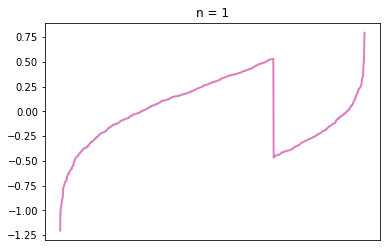

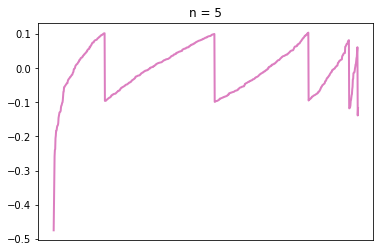

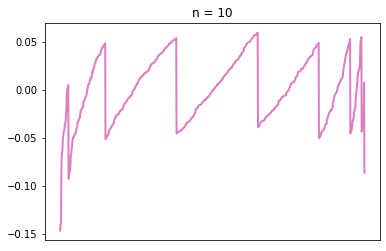

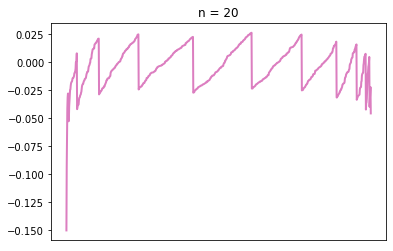

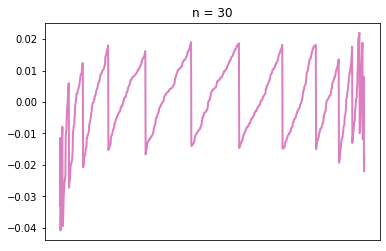

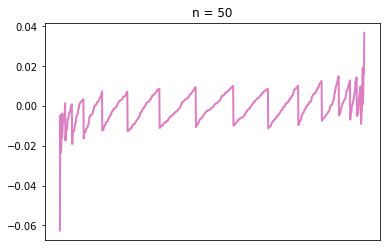

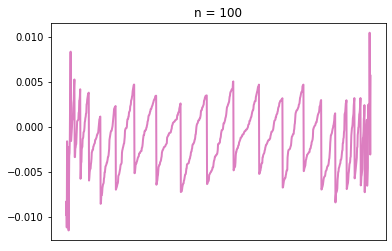

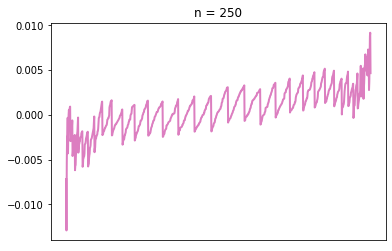

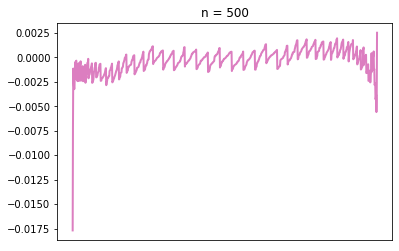

In [88]:
for n in list_of_ns:
    plot_difference_from_normal(n = n, show_title = True)
#     plt.savefig('./charts/difference/difference_ ' + str(n) + '.png')
    plt.show()

In [94]:
# and now for the animation 
def plot_difference_from_normal_with_n(n, n_max):

    fig = plt.figure(figsize=(7,4)) 
    gs = gridspec.GridSpec(1, 3, width_ratios=[6, 0.5, 0.5]) 
    ax0 = plt.subplot(gs[0])
    ax2 = plt.subplot(gs[2])

    ax0.plot(
        list(range(1,1000)), difference_between_norm_and_sample_mean[n], 
        lw = 2, color = sns.color_palette("muted")[6]
    )
    
    ax0.set_ylim(-0.1, 0.1)
    
    ax2.bar(height = n, x = 'n', width = 0.01, color = sns.color_palette("muted")[3]
    )
    
    ax2.set_ylim(0, n_max)

In [95]:
for n in range(10,201):
    plot_difference_from_normal_with_n(n = n, n_max = 200)
    if n < 10: 
        extra_zeros = '00'
    elif n < 100:
        extra_zeros = '0'
    else:
        extra_zeros = ''
    plt.savefig('./charts/difference_animation/difference_animation_ ' + extra_zeros + str(n) + '.png')
    plt.close()

In [88]:
# after this, navigate to folder, type in terminal: 
# convert -delay 10 difference_animation_*.png difference.gif